<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-II/blob/main/M%C3%A9todo_de_Galerkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de Galerkin

El método de Galerkin se define como un método de residuos ponderados utilizado para aproximar soluciones de ecuaciones diferenciales, especialmente adecuado para aplicaciones que involucran condiciones de frontera.

Es una técnica crucial en el análisis de elementos finitos, desarrollada originalmente para la mecánica estructural.

In [91]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Queremos resolver la ecuación
$$-\frac{d^2u}{dx^2}+u-x = 0$$
sujeta a las condiciones:
$$u(0)=u(1)=0$$

Usar

$$u_3 = \sum_{i = 1}^{3} α_i β_i(x) $$

con $β_i(x) = \sin(i\pi x)$ para encontrar el valor de las constantes $α_i$.


Analíticamente:

In [92]:
x = sp.symbols('x') #Introducimos una variable
u = sp.Function('u') #Esto es una función

In [93]:
ode = - u(x).diff(x, x) + u(x) - x #Cambiamos para -u'' + u - x
sp.dsolve(ode, u(x))

Eq(u(x), C1*exp(-x) + C2*exp(x) + x)

**Condiciones de frontera**

$$u(0) = u(1) = 0$$

In [94]:
sol = sp.dsolve(ode, ics={u(0): 0, u(1): 0}) #Las condiciones de frontera

In [95]:
sol

Eq(u(x), x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2)))

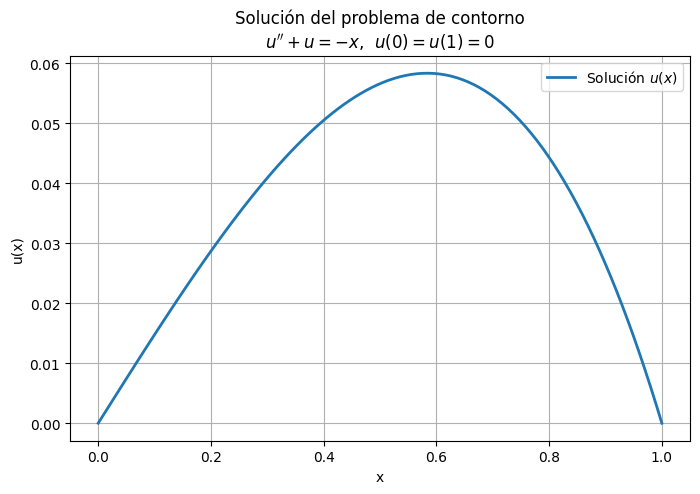

In [96]:
#Convertimos en un arreglo de numpy
u_expr = sol.rhs

u_num = sp.lambdify(x, u_expr, "numpy")

#################
xx = np.linspace(0, 1, 100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title("Solución del problema de contorno\n$u'' + u = -x$,  $u(0)=u(1)=0$")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

In [97]:
a, b, c= sp.symbols('a b c') #a, b, c cumple la función de ser alpha

In [98]:
#Calcular cada valor de beta, para que después sea más sencillo

beta_1 = sp.sin(sp.pi*x)
beta_2 = sp.sin(2*sp.pi*x)
beta_3 = sp.sin(3*sp.pi*x)

In [99]:
#Función de prueba u_n(x) que cumple u(0)=u(1)=0
u_3 = a*beta_1 + b*beta_2 + c*beta_3

In [100]:
u_3

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x)

Definimos el residuo (error) E

In [101]:
u_3_d = sp.diff(u_3, x, 2) #Se deriva respecto a x, dos veces

Para el residuo es poner:

$$ - u^{''} + u - x$$

In [102]:
E = - u_3_d + u_3 - x

In [103]:
E

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

In [104]:
E.simplify() #Esto es para simplificar a 'E'

a*sin(pi*x) + b*sin(2*pi*x) + c*sin(3*pi*x) - x + pi**2*(a*sin(pi*x) + 4*b*sin(2*pi*x) + 9*c*sin(3*pi*x))

Ahora, imponemos las condiciones:

$$\int_0^1 E\sin(\pi x)dx=0$$
$$\int_0^1 E\sin(2\pi x)dx=0$$
$$\int_0^1 E\sin(3\pi x)dx=0$$

Para explicar que son los $I_i$, hay que pensarlo como:


Multiplicamos el error $E$ por la base que corresponde $\beta_i$ y después se integra. Así se va generando cada $I_i$, en este caso hasta $I_3$

In [105]:
I_1 = sp.integrate(E*sp.sin(sp.pi*x), (x, 0, 1))
I_2 = sp.integrate(E*sp.sin(2*sp.pi*x), (x, 0, 1))
I_3 = sp.integrate(E*sp.sin(3*sp.pi*x), (x, 0, 1))

In [106]:
I_1

a/2 + pi**2*a/2 - 1/pi

In [107]:
I_2

b/2 + 2*pi**2*b + 1/(2*pi)

In [108]:
I_3

c/2 + 9*pi**2*c/2 - 1/(3*pi)

Para encontrar los valores de $a,b $ y $c$, se resuelve el sistema de ecuaciones.

In [109]:
soleq = sp.solve([I_1, I_2, I_3], [a, b, c],  simplify=True) # para igualar  a 0
soleq

{a: 2/(pi + pi**3), b: -1/(pi + 4*pi**3), c: 2/(3*pi + 27*pi**3)}

In [110]:
u_approx = u_3.subs(soleq)

In [111]:
u_approx

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [112]:
u_approx.simplify()

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [113]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

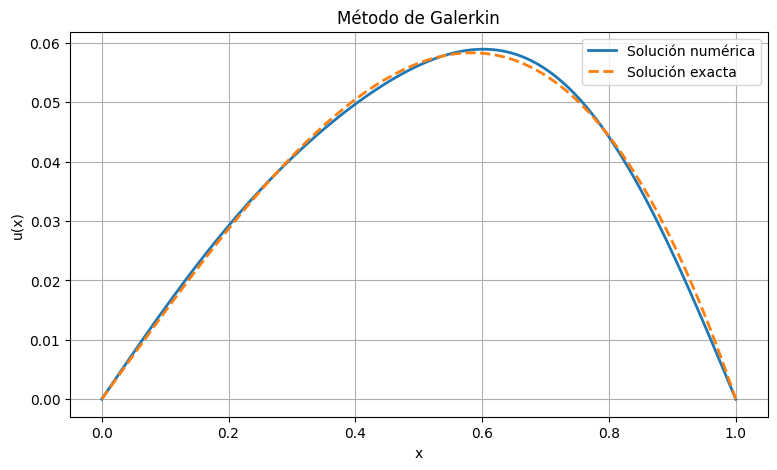

In [114]:
#Solución analítica y numérica
xx = np.linspace(0, 1, 100)

plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label="Solución numérica", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

plt.title("Método de Galerkin")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()

**Calcular el error de aproximación**

Mandamos a llamar las variables donde están guardadas la solución exacta y la aproximación.

In [115]:
exacta = sol.rhs
exacta

x - E*exp(x)/(-1 + exp(2)) + E*exp(-x)/(-1 + exp(2))

In [116]:
aproximacion = u_approx
aproximacion

2*sin(pi*x)/(pi + pi**3) - sin(2*pi*x)/(pi + 4*pi**3) + 2*sin(3*pi*x)/(3*pi + 27*pi**3)

In [117]:
error = exacta - aproximacion
error #Para ver el error de la aproximación numérica

x - E*exp(x)/(-1 + exp(2)) - 2*sin(pi*x)/(pi + pi**3) + sin(2*pi*x)/(pi + 4*pi**3) - 2*sin(3*pi*x)/(3*pi + 27*pi**3) + E*exp(-x)/(-1 + exp(2))

Para sacar el error máximo

In [118]:
error_fn = sp.lambdify(x, error, "numpy")

max_error = np.max(np.abs(error_fn(xx)))

print("El error máximo es:", max_error)

El error máximo es: 0.001981555865915169
